In [6]:
# Adapted from the tutorial at https://mccormickml.com/2019/05/14/BERT-word-embeddings-tutorial/

In [15]:
!pip install -r requirements.txt

  Using cached astroid-2.3.3-py3-none-any.whl (205 kB)
  Using cached bleach-3.1.1-py2.py3-none-any.whl (150 kB)
  Using cached blis-0.4.1-cp36-cp36m-manylinux1_x86_64.whl (3.7 MB)
  Using cached catalogue-1.0.0-py2.py3-none-any.whl (7.7 kB)
  Using cached certifi-2019.11.28-py2.py3-none-any.whl (156 kB)
  Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
  Using cached cymem-2.0.3-cp36-cp36m-manylinux1_x86_64.whl (32 kB)
  Using cached decorator-4.4.1-py2.py3-none-any.whl (9.2 kB)
  Using cached defusedxml-0.6.0-py2.py3-none-any.whl (23 kB)
  Using cached docutils-0.15.2-py3-none-any.whl (547 kB)
  Using cached entrypoints-0.3-py2.py3-none-any.whl (11 kB)
  Using cached idna-2.9-py2.py3-none-any.whl (58 kB)
  Using cached importlib_metadata-1.5.0-py2.py3-none-any.whl (30 kB)
  Using cached ipykernel-5.1.4-py3-none-any.whl (116 kB)
  Using cached ipython-7.12.0-py3-none-any.whl (777 kB)
  Using cached ipywidgets-7.5.1-py2.py3-none-any.whl (121 kB)
  Using cached isort-4.3.21-py2

  Using cached typed_ast-1.4.1-cp36-cp36m-manylinux1_x86_64.whl (737 kB)
  Using cached urllib3-1.25.8-py2.py3-none-any.whl (125 kB)
  Using cached wasabi-0.6.0-py3-none-any.whl (20 kB)
  Using cached wcwidth-0.1.8-py2.py3-none-any.whl (17 kB)
  Using cached widgetsnbextension-3.5.1-py2.py3-none-any.whl (2.2 MB)
Processing /home/jupyter/.cache/pip/wheels/0d/85/48/15d7bfab92a2d0e87372224c1f628fc57db7447a663a58e86c/wrapt-1.11.2-cp36-cp36m-linux_x86_64.whl
  Using cached zipp-3.0.0-py3-none-any.whl (4.8 kB)
ERROR: scikit-image 0.15.0 has requirement networkx>=2.0, but you'll have networkx 1.11 which is incompatible.
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.10.10
ERROR: Cannot uninstall 'wrapt'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [16]:
import torch
from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
%matplotlib inline

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

ModuleNotFoundError: No module named 'pytorch_pretrained_bert'

In [ ]:
# list(tokenizer.vocab.keys())[5000:5020]
list(tokenizer.vocab.keys())[17733]

In [1]:
# Define a new example sentence with multiple meanings of the word "bank"
# text = "After stealing money from the bank vault, the bank robber was seen " \
#        "fishing on the Mississippi river bank."

# text = "[CLS] Why the disgusted face [SEP] Did you smell some disgustingly ripe cheese [SEP]"
text = "[CLS] She made a disgusted pout [SEP] Her disgusted expression was contagious [SEP]"

# Add the special tokens.
# marked_text = "[CLS] " + text + " [SEP]"

# Split the sentence into tokens.
# tokenized_text = tokenizer.tokenize(marked_text)
tokenized_text = tokenizer.tokenize(text)
print(tokenized_text)

# Map the token strings to their vocabulary indeces.
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

# Display the words with their indeces.
for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

NameError: name 'tokenizer' is not defined

In [ ]:
# Define a new example sentence with multiple meanings of the word "bank"
# text = "After stealing money from the bank vault, the bank robber was seen " \
#        "fishing on the Mississippi river bank."

# text = "[CLS] Why the disgusted face [SEP] Did you smell some disgustingly ripe cheese [SEP]"
text = "[CLS] She made a disgusted pout [SEP] Her disgusted expression was contagious [SEP]"

# Add the special tokens.
# marked_text = "[CLS] " + text + " [SEP]"

# Split the sentence into tokens.
# tokenized_text = tokenizer.tokenize(marked_text)
tokenized_text = tokenizer.tokenize(text)
print(tokenized_text)

# Map the token strings to their vocabulary indeces.
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

# Display the words with their indeces.
for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

In [7]:
# Mark each of the tokens as belonging to sentence "0" or "1".
# segments_ids = [1] * len(tokenized_text)
segments_ids = [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]
# segments_ids = [0,0,0,1,1]
print (segments_ids)
print(indexed_tokens)
print(tokenized_text[3])

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
[101, 2016, 2081, 1037, 17733, 13433, 4904, 102, 2014, 17733, 3670, 2001, 9530, 15900, 6313, 102]
a


In [8]:
# Convert inputs to PyTorch tensors
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased')

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): BertLayerNorm()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): BertLayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
        (intermediate): BertIntermediate(
          (dense): Lin

In [9]:
# Predict hidden states features for each layer
with torch.no_grad():
    encoded_layers, _ = model(tokens_tensor, segments_tensors)

In [10]:
print ("Number of layers:", len(encoded_layers))
layer_i = 0

print ("Number of batches:", len(encoded_layers[layer_i]))
batch_i = 0

print ("Number of tokens:", len(encoded_layers[layer_i][batch_i]))
token_i = 3

print ("Number of hidden units:", len(encoded_layers[layer_i][batch_i][token_i]))

Number of layers: 12
Number of batches: 1
Number of tokens: 16
Number of hidden units: 768


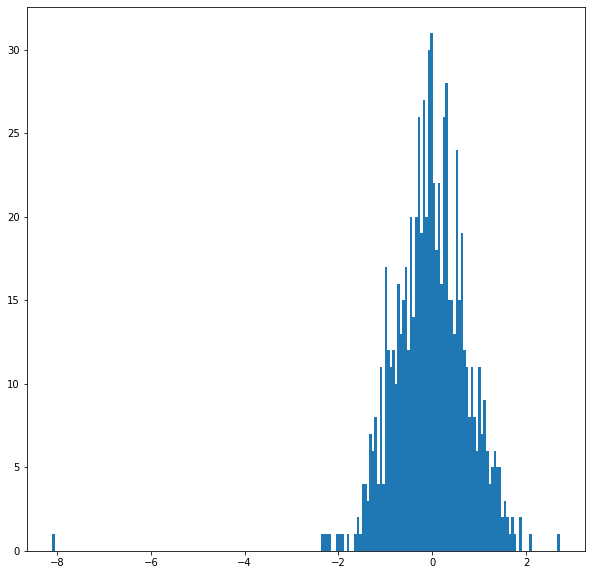

In [11]:
# For the 5th token in our sentence, select its feature values from layer 5.
token_i = 4
layer_i = 5
vec = encoded_layers[layer_i][batch_i][token_i]
# print(vec)

# Plot the values as a histogram to show their distribution.
plt.figure(figsize=(10,10))
plt.hist(vec, bins=200)
plt.show()

In [12]:
# `encoded_layers` is a Python list.
print('     Type of encoded_layers: ', type(encoded_layers))

# Each layer in the list is a torch tensor.
print('Tensor shape for each layer: ', encoded_layers[0].size())

     Type of encoded_layers:  <class 'list'>
Tensor shape for each layer:  torch.Size([1, 16, 768])


In [14]:
# Concatenate the tensors for all layers. We use `stack` here to
# create a new dimension in the tensor.
token_embeddings = torch.stack(encoded_layers, dim=0)

token_embeddings.size()

torch.Size([12, 1, 16, 768])

In [15]:
# Remove dimension 1, the "batches".
token_embeddings = torch.squeeze(token_embeddings, dim=1)

token_embeddings.size()

torch.Size([12, 16, 768])

In [30]:
# Swap dimensions 0 and 1.
token_embeddings = token_embeddings.permute(1,0,2)

token_embeddings.size()

torch.Size([12, 16, 768])

In [31]:
print(len(token))

12


In [17]:
# Concatenate the last 4 hidden layers to create word embeddings.
# Stores the token vectors, with shape [22 x 3,072]
token_vecs_cat = []

# `token_embeddings` is a [22 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:
    
    # `token` is a [12 x 768] tensor

    # Concatenate the vectors (that is, append them together) from the last 
    # four layers.
    # Each layer vector is 768 values, so `cat_vec` is length 3,072.
    cat_vec = torch.cat((token[-1], token[-2], token[-3], token[-4]), dim=0)
    
    # Use `cat_vec` to represent `token`.
    token_vecs_cat.append(cat_vec)

print ('Shape is: %d x %d' % (len(token_vecs_cat), len(token_vecs_cat[0])))
print(token_vecs_cat[0])

Shape is: 16 x 3072
tensor([ 0.1730,  0.5220, -0.6051,  ..., -0.4742,  0.0104,  0.4212])


In [23]:
# Sum the last 4 hidden layers to create word embeddings.
# Stores the token vectors, with shape [22 x 768]
token_vecs_sum = []

# `token_embeddings` is a [22 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:

    # `token` is a [12 x 768] tensor

    # Sum the vectors from the last four layers.
    sum_vec = torch.sum(token[-4:], dim=0)
    
    # Use `sum_vec` to represent `token`.
    token_vecs_sum.append(sum_vec)

print ('Shape is: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))

Shape is: 16 x 768


In [26]:
# Concatenate the last 4 hidden layers to create word embeddings.
# Stores the token vectors, with shape [22 x 3,072]
token_vecs_cat_first = []

# `token_embeddings` is a [22 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:
    
    # `token` is a [12 x 768] tensor

    # Concatenate the vectors (that is, append them together) from the last 
    # four layers.
    # Each layer vector is 768 values, so `cat_vec` is length 3,072.
    cat_vec = torch.cat((token[0], token[1], token[2], token[3]), dim=0)
    
    # Use `cat_vec` to represent `token`.
    token_vecs_cat_first.append(cat_vec)

print ('Shape is: %d x %d' % (len(token_vecs_cat_first), len(token_vecs_cat_first[0])))
print(token_vecs_cat[0])

Shape is: 16 x 3072
tensor([ 0.1730,  0.5220, -0.6051,  ..., -0.4742,  0.0104,  0.4212])


In [32]:
# Sum the last 4 hidden layers to create word embeddings.
# Stores the token vectors, with shape [22 x 768]
token_vecs_sum_first = []

# `token_embeddings` is a [22 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:

    # `token` is a [12 x 768] tensor

    # Sum the vectors from the last four layers.
    sum_vec = torch.sum(token[:4], dim=0)
    
    # Use `sum_vec` to represent `token`.
    token_vecs_sum_first.append(sum_vec)

print ('Shape is: %d x %d' % (len(token_vecs_sum_first), len(token_vecs_sum_first[0])))

Shape is: 12 x 768


In [33]:
# Concatenate the last 4 hidden layers to create word embeddings.
# Stores the token vectors, with shape [22 x 3,072]
token_vecs_cat_middle1 = []

# `token_embeddings` is a [22 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:
    
    # `token` is a [12 x 768] tensor

    # Concatenate the vectors (that is, append them together) from the last 
    # four layers.
    # Each layer vector is 768 values, so `cat_vec` is length 3,072.
    cat_vec = torch.cat((token[4], token[5], token[6], token[7]), dim=0)
    
    # Use `cat_vec` to represent `token`.
    token_vecs_cat_middle1.append(cat_vec)

print ('Shape is: %d x %d' % (len(token_vecs_cat_middle1), len(token_vecs_cat_middle1[0])))
print(token_vecs_cat[0])

Shape is: 12 x 3072
tensor([ 0.1730,  0.5220, -0.6051,  ..., -0.4742,  0.0104,  0.4212])


In [34]:
# Sum the last 4 hidden layers to create word embeddings.
# Stores the token vectors, with shape [22 x 768]
token_vecs_sum_middle1 = []

# `token_embeddings` is a [22 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:

    # `token` is a [12 x 768] tensor

    # Sum the vectors from the last four layers.
    sum_vec = torch.sum(token[4:8], dim=0)
    
    # Use `sum_vec` to represent `token`.
    token_vecs_sum_middle1.append(sum_vec)

print ('Shape is: %d x %d' % (len(token_vecs_sum_middle1), len(token_vecs_sum_middle1[0])))

Shape is: 12 x 768


In [38]:
# Concatenate the last 4 hidden layers to create word embeddings.
# Stores the token vectors, with shape [22 x 3,072]
token_vecs_cat_middle2 = []

# `token_embeddings` is a [22 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:
    
    # `token` is a [12 x 768] tensor

    # Concatenate the vectors (that is, append them together) from the last 
    # four layers.
    # Each layer vector is 768 values, so `cat_vec` is length 3,072.
    cat_vec = torch.cat((token[8], token[9], token[10], token[11]), dim=0)
    
    # Use `cat_vec` to represent `token`.
    token_vecs_cat_middle2.append(cat_vec)

print ('Shape is: %d x %d' % (len(token_vecs_cat_middle2), len(token_vecs_cat_middle2[0])))
print(token_vecs_cat[0])

Shape is: 12 x 3072
tensor([ 0.1730,  0.5220, -0.6051,  ..., -0.4742,  0.0104,  0.4212])


In [40]:
# Sum the last 4 hidden layers to create word embeddings.
# Stores the token vectors, with shape [22 x 768]
token_vecs_sum_middle2 = []

# `token_embeddings` is a [22 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:

    # `token` is a [12 x 768] tensor

    # Sum the vectors from the last four layers.
    sum_vec = torch.sum(token[8:12], dim=0)
    
    # Use `sum_vec` to represent `token`.
    token_vecs_sum_middle2.append(sum_vec)

print ('Shape is: %d x %d' % (len(token_vecs_sum_middle2), len(token_vecs_sum_middle2[0])))

Shape is: 12 x 768


In [ ]:
# Concatenate the last 4 hidden layers to create word embeddings.
# Stores the token vectors, with shape [22 x 3,072]
token_vecs_cat_all
.333333333333333= []

# `token_embeddings` is a [22 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:
    
    # `token` is a [12 x 768] tensor

    # Concatenate the vectors (that is, append them together) from the last 
    # four layers.
    # Each layer vector is 768 values, so `cat_vec` is length 3,072.
    cat_vec = torch.cat((token[8], token[9], token[10], token[11]), dim=0)
    
    # Use `cat_vec` to represent `token`.
    token_vecs_cat_middle2.append(cat_vec)

print ('Shape is: %d x %d' % (len(token_vecs_cat_middle2), len(token_vecs_cat_middle2[0])))
print(token_vecs_cat[0])

In [20]:
# Make a single vector to represent the pair of sentences by averaging across tokens.
# `encoded_layers` has shape [12 x 1 x 22 x 768]
sentences_vec = []
# `token_vecs` is a tensor with shape [22 x 768]
token_vecs = encoded_layers[11][0]

# Calculate the average of all 22 token vectors.
sentence_embedding = torch.mean(token_vecs, dim=0)
for s in sentence_embedding:
    sentences_vec.append(s)
print ("Our final sentence embedding vector of shape:", sentence_embedding.size())
print(sentence_embedding[767])
print(sentence_embedding[-1])
print(f'Shape of sentences vector is: {len(sentences_vec)}')
print(sentences_vec[-1])

Our final sentence embedding vector of shape: torch.Size([768])
tensor(0.0927)
tensor(0.0927)
Shape of sentences vector is: 768
tensor(0.0927)


In [21]:
for i, token_string in enumerate(tokenized_text):
    print(i, token_string)

0 [CLS]
1 she
2 made
3 a
4 disgusted
5 po
6 ##ut
7 [SEP]
8 her
9 disgusted
10 expression
11 was
12 con
13 ##tag
14 ##ious
15 [SEP]


In [39]:
from scipy.spatial.distance import cosine
similarity = 1 - cosine(token_vecs_cat[4], token_vecs_cat[9])
print(f'Similarity of {tokenized_text[4]} and {tokenized_text[9]} in token_vecs_cat is: {similarity}')
similarity = 1 - cosine(token_vecs_sum[4], token_vecs_sum[9])
print(f'Similarity of {tokenized_text[4]} and {tokenized_text[9]} in token_vecs_sum is: {similarity}')
similarity = 1 - cosine(token_vecs_cat_first[4], token_vecs_cat_first[9])
print(f'Similarity of {tokenized_text[4]} and {tokenized_text[9]} in token_vecs_cat_first is: {similarity}')
similarity = 1 - cosine(token_vecs_sum_first[4], token_vecs_sum_first[9])
print(f'Similarity of {tokenized_text[4]} and {tokenized_text[9]} in token_vecs_sum_first is: {similarity}')
similarity = 1 - cosine(token_vecs_cat_middle1[4], token_vecs_cat_middle1[9])
print(f'Similarity of {tokenized_text[4]} and {tokenized_text[9]} in token_vecs_cat_middle1 is: {similarity}')
similarity = 1 - cosine(token_vecs_sum_middle1[4], token_vecs_sum_middle1[9])
print(f'Similarity of {tokenized_text[4]} and {tokenized_text[9]} in token_vecs_sum_middle1 is: {similarity}')
similarity = 1 - cosine(token_vecs_cat_middle2[4], token_vecs_cat_middle2[9])
print(f'Similarity of {tokenized_text[4]} and {tokenized_text[9]} in token_vecs_cat_middle2 is: {similarity}')
similarity = 1 - cosine(token_vecs_sum_middle2[4], token_vecs_sum_middle2[9])
print(f'Similarity of {tokenized_text[4]} and {tokenized_text[9]} in token_vecs_sum_middle2 is: {similarity}')

Similarity of disgusted and disgusted in token_vecs_cat is: 0.7731837630271912
Similarity of disgusted and disgusted in token_vecs_sum is: 0.7783510684967041
Similarity of disgusted and disgusted in token_vecs_cat_first is: 0.8062489628791809
Similarity of disgusted and disgusted in token_vecs_sum_first is: 0.6329748630523682
Similarity of disgusted and disgusted in token_vecs_cat_middle1 is: 0.6662847995758057
Similarity of disgusted and disgusted in token_vecs_sum_middle1 is: 0.6929298043251038
Similarity of disgusted and disgusted in token_vecs_cat_middle2 is: 0.6831039786338806
Similarity of disgusted and disgusted in token_vecs_sum_middle2 is: 0.7416453957557678
